Let us import all the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.stats import binom, gamma, norm

TASK A \
Lets calculate the first 2 moments(i = 1, 2) for the given data set.

In [2]:
# load the data from 3.data
data = np.loadtxt('3.data')

def Moment(data, i) :
    moment = np.sum(data**i, axis=0)/(len(data))
    return moment

moment_1 = Moment(data, 1)
moment_2 = Moment(data, 2)
data_size = len(data)

print('1st moment = ', moment_1)
print('2nd moment = ', moment_2)
print('Data size = ', data_size)

1st moment =  6.496145618324817
2nd moment =  46.554361807879815
Data size =  10000


TASK B \
Let us plot the histogram and try to guess the distribution. \
From the graph it can be seen that $\mu$ seems to be around 6 for normal distribution.

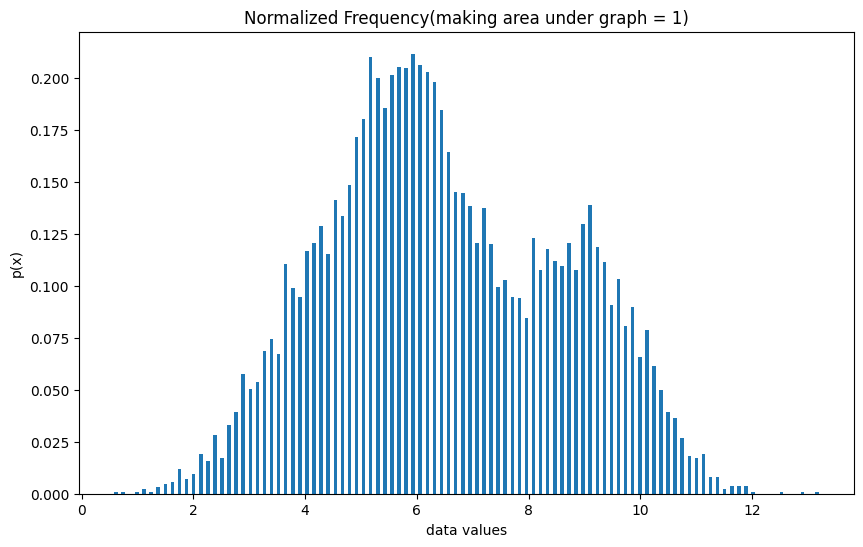

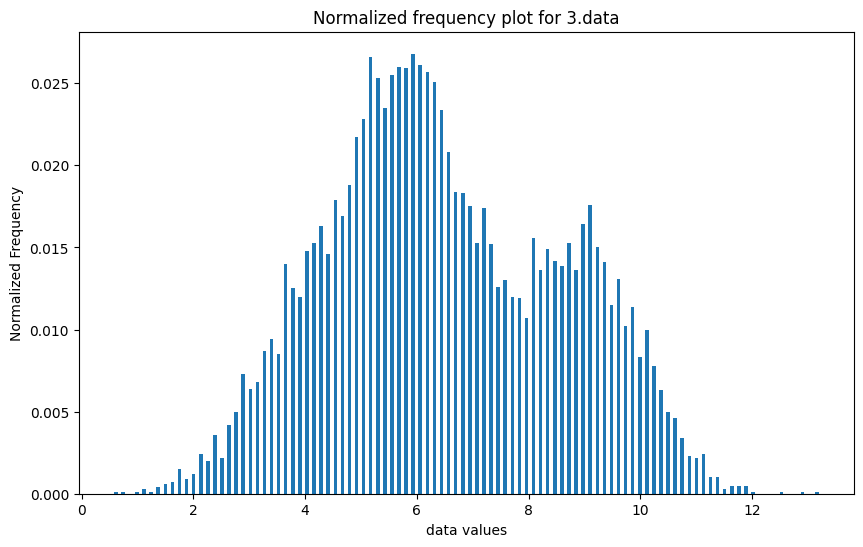

In [10]:
# Compute the histogram
hist, bins = np.histogram(data, bins = 100)

# Normalize the hist
hist = hist/(data_size)
bin_centers = (bins[:100] + bins[1:])/2

# Plot the histogram directly using plt.hist. 
# We set density = true ie it sort of is like PDF as area becomes 1.
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100,density=True,rwidth=0.5)
plt.xlabel("data values")
plt.ylabel("p(x)")
plt.title("Normalized Frequency(making area under graph = 1)")
plt.savefig('../images/3b.png')
plt.show()

# Histogram using plt.bar after we count. Here we aren't making area 1.
# We are just showing the normalized frequencies.
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, hist, width=0.5*np.diff(bins))
plt.xlabel("data values")
plt.ylabel("Normalized Frequency")
plt.title("Normalized frequency plot for 3.data")
plt.show()

# Both graphs are exactly similar except y coordinate scaling.


TASK C \
We need to use the formulas for $\mu_{1}^{Bin}$ and $\mu_{2}^{Bin}$ of the distribution Bin(n,p) and compute n, p such that these moments match that of the original distribution. \
$\mu_{1}^{Bin}$ = $np$ \
$\mu_{2}^{Bin}$ = $np + n(n-1)p^{2}$ \
See the proof in the report.


20 0.32968652963756667


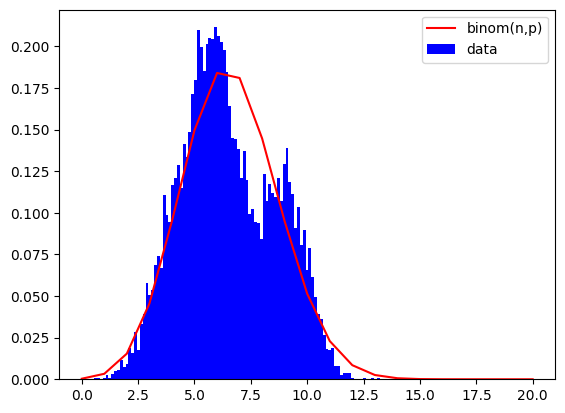

In [3]:
# define 1st moment.
def moment_equations_binom(vars):
    n, p = vars
    moment_1_eq = n*p - (moment_1)
    moment_2_eq = n*p + n*(n-1)*(p**2) - moment_2
    return (moment_1_eq, moment_2_eq)

# Initiate vars for the solution
N = 1
p = 1

N, p = fsolve(moment_equations_binom, (N, p))
N_f = np.floor(N)
N_c = np.ceil(N)

# Lets chose better N based on satisfiability of moment 1
error_f = abs(moment_equations_binom((N_f, p))[0])
error_c = abs(moment_equations_binom((N_c, p))[0])

if (error_f>error_c):  
    N = int(N_c) 
else :
    N = int(N_f)

print(N, p)
# Now lets plot.
x = np.linspace(0, N, N+1)
plt.plot(x, binom.pmf(x, N, p),color = 'r',label = "binom(n,p)")
plt.hist(data, bins = 100, density=True, color='b', rwidth=1, label="data")
plt.legend()
plt.savefig('../images/3c.png')
plt.show()


TASK D \
Now we do the same as we did for Task C but for the gamma distribution. /
For gamma distribution it turns out that :\
$\mu_{1}^{Gamma}\ =\ k\theta$ \
$\mu_{2}^{Gamma}\ =\ k(k+1)\theta^{2}$

0.6703134703624307 9.691205541246182


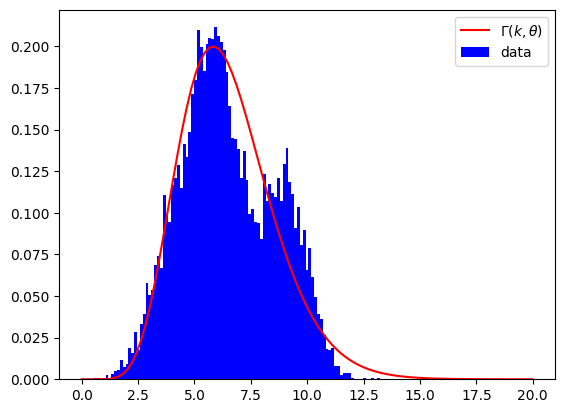

In [4]:
# Define the moment function
def moment_equations_gamma(vars):
    theta, k = vars 
    moment_1_eq = k*theta - moment_1
    moment_2_eq = k*(k+1)*(theta**2) - moment_2
    return (moment_1_eq, moment_2_eq)

# Initialize the solution vars
theta, k = 1, 1

# Solve using fsolve
theta, k = fsolve(moment_equations_gamma, (theta, k))

# Now lets plot gamms distribution for x from 0 to 20
x = np.linspace(0, 20, 100)

print(theta, k)

plt.plot(x, gamma.pdf(x, k, scale = theta), color = 'r',label = '$\\Gamma(k, \\theta)$')
plt.hist(data, bins = 100, density=True, color='b', rwidth=1, label="data")
plt.legend()
plt.savefig('../images/3d.png')
plt.show()

TASK E \
We need to calculate the log likelihoods for both binomial and gamma distributions wrt our data in 3.data. \

Binomial Distribution turns out to be slightly better fit than Gamma distribution from the average likelihood values.

In [7]:
# Binomial distribution's log likelihood:
# Round the data.
rounded_data = np.round(data)
binomial_likelihood = np.mean(np.log(binom.pmf(rounded_data, N, p)))

# Gamma likelihood :
gammma_likelihood = np.mean(np.log(gamma.pdf(data, k, scale = theta)))

print(f'Binomial Distribution Average Likelihood = {binomial_likelihood}')
print(f'Gamma Distribution Average Likelihood = {gammma_likelihood}')

Binomial Distribution Average Likelihood = -2.1570681154346776
Gamma Distribution Average Likelihood = -2.1608217722067957


TASK F\
We need to find the 4 parameters for the Gaussian Mixture model and plot it.\
Judging from the Average Negative loglikelihood value the previous two turn out to be slightly better fit than this GMM.

0.9945196853538181


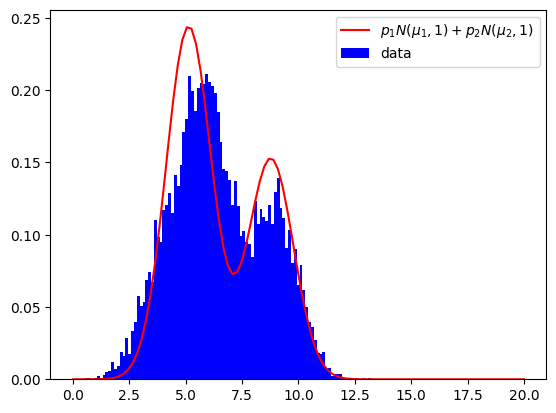

Average Negative Log Likelihood of Mixed Gaussian Model = 2.1830387449113173


In [8]:
# First let us find moment_3 and moment_4.
moment_3 = Moment(data, 3)
moment_4 = Moment(data, 4)

# Now solve for the parameters

def gaussian_moment_equations(vars):
    p1, p2, m1, m2 = vars
    moment_eq_1 = (p1*m1 + p2*m2) - moment_1
    moment_eq_2 = p1*(1 + (m1**2)) + p2*(1 + (m2**2)) - moment_2
    moment_eq_3 = p1*((m1**3) + 3*m1) + p2*((m2**3) + 3*m2) - moment_3
    moment_eq_4 = p1*((m1**4) + 6*(m1**2) + 3) + p2*((m2**4) + 6*(m2**2) + 3) - moment_4
    # constraint = p1 + p2 - 1
    
    return (moment_eq_1, moment_eq_2, moment_eq_3, moment_eq_4)

# Give proper initial values(m's close to expected) for proper convergence.
p1, p2, m1, m2 = 0, 1, 6, 8 

p1, p2, m1, m2 = fsolve(gaussian_moment_equations, (p1, p2, m1, m2))
print(p1+p2) # Check

# Now time for plotting
# data
x = np.linspace(0, 20, 100)
norm1 = norm.pdf(x, loc = m1, scale = 1)
norm2 = norm.pdf(x, loc = m2, scale = 1)
norm_mixed = p1*norm1 + p2*norm2

plt.plot(x, norm_mixed, color = 'r', label = '$p_{1}N(\\mu_{1},1)+p_{2}N(\\mu_{2},1)$')
plt.hist(data, bins = 100, density=True, color='b', rwidth=1, label="data")
plt.legend()
plt.savefig('../images/3f.png')
plt.show()

# Let us compute average negative log likelihood for this plot.
norm1_data = norm.pdf(data, loc = m1, scale = 1)
norm2_data = norm.pdf(data, loc = m2, scale = 1)
mixed_norm_data = p1*norm1_data + p2*norm2_data
mixed_norm_log_likelihood = -np.mean(np.log(mixed_norm_data))

print(f"Average Negative Log Likelihood of Mixed Gaussian Model = {mixed_norm_log_likelihood}") 